# **Features Most Important to Predict Life Expectancy**

# **Introduction**

Life Expectancy is considered to be one of the most important attributes to describe overall public health across countries. From a broad view, we could see that inequality in life expectancies amongst the countries with the highest life expectancies against the countries with the lowest life expectancies (Japan with 82.5 years and Sierra Leone with 49.9) are pretty significant. Why does this disparity exist, and what are the main features that lead to it? 

How can we utilize machine learning and data analytic tools to understand the reasonings and perhaps causation in terms of the features that lead to different life expectancies across the various regions of the world?


This project aims to make an attempt to utilize data on Life Expectancy across countries of the world for the years 2000-2015, along with a set of various social, economic, and health indicators for these countries.

[Dataset](https://www.kaggle.com/kumarajarshi/life-expectancy-who): We utilize dataset from the following source in our project: https://www.kaggle.com/kumarajarshi/life-expectancy-who

The goal of this project is to work with life expectancy data from 193 countries across different years based on 18 different features to:
1. Identify which Machine Learning model most accurately predicts life expectancy of the population
2. Plot feature importance on a scale of 0 to 1
3. Confirm feature importance through individual feature regression by computing R2 value of each
4. Analyze the percentage each component contributes to the variance of the dataset, through PCA.



---


#**Importing Libraries**


---



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error, mean_absolute_error



---


#**Data Loading**

---



We use the code below to load the input file containing the Life Expectancy Data



---



In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Life Expectancy Data.csv to Life Expectancy Data.csv
User uploaded file "Life Expectancy Data.csv" with length 333442 bytes




---

**Load data into dataframe**


---





In [ ]:
df_raw = pd.read_csv('Life Expectancy Data.csv')

In [ ]:
# The data consists of information from 193 countries
# from multiple different years
# across 18 different features
print(df_raw.shape)
df_raw.head(5)

(2938, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5




---


#**Data Cleaning**


---




The data consists of NaN values in some places across many columns. It therefore requires cleaning.


*   We delete the rows where life expectancy is missing
*   Cells where feature values are missing are filled with the median value computed along the feature column


If we drop the rows with missing values completely, we lose significant data. Also because the data is for countries, there are some significant outliers, such as in the population data. Hence, taking a mean doesn't seem best either.

`Life expectancy` is our target variable. Here, we check which countries have missing values for life expectancy


---



In [ ]:
# print the index of the country and the name of the country where Life Expectancy is missing
print(df_raw.loc[df_raw.loc[:,'Life expectancy '].isnull(),'Country'])

624              Cook Islands
769                  Dominica
1650         Marshall Islands
1715                   Monaco
1812                    Nauru
1909                     Niue
1958                    Palau
2167    Saint Kitts and Nevis
2216               San Marino
2713                   Tuvalu
Name: Country, dtype: object




---


**Remove the missing values for the `Life expectancy` field**



---



In [ ]:
df = df_raw.dropna(subset=['Life expectancy '])
df.shape

(2928, 22)



---


**Check the sum of null values for each field**


---



In [ ]:
#check the number of null values in each field so we have the idea of missing values
df_raw.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64



---


**Fill missing feature values with median along the
feature column**

---



In [ ]:
# list of columns with missing values
mis_col = [ 'Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B',' BMI ',  'Polio', 'Total expenditure',
       'Diphtheria ',  'GDP', 'Population',' thinness  1-19 years', ' thinness 5-9 years','Income composition of resources',
           'Schooling']

# Imputing columns
for i in mis_col:
    df.loc[df.loc[:,i].isnull(),i] = df.loc[:,i].median()
print("count of NULL values after imputation")
df.isnull().sum()

count of NULL values after imputation


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
df.shape

(2928, 22)


---


# **Preliminary Data Analysis**


---



**Mean value of life expectancy for developed and developing countries separately**



---





In [ ]:
df_age_status = df[['Status', 'Life expectancy ']]
df_age_status = df_age_status.groupby(["Status"], as_index = False).mean()
df_age_status

,Status,Life expectancy
0,Developed,79.197852
1,Developing,67.111465


The bar plot below shows in the preliminary analysis how the life expectancy averages compare between the developed and developing countries.

As the graph shows, the mean Life Expectancy in Developed countries is significantly higher (about 10 additional years) than the developing countries.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


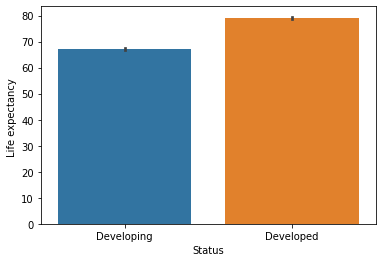

In [ ]:
sns.barplot(df['Status'],df['Life expectancy '])
plt.show()



---

**5 Highest Life Expectancies**


---



In [ ]:
# Group the df values by countries and find the means of their Life expectancies. Sort them in descending order
sort_country = df.groupby('Country')['Life expectancy '].mean().sort_values(ascending = False)
print("The 5 countries with the highest Life Expectancies are the following:")
print(sort_country.head(5))

The 5 countries with the highest Life Expectancies are the following:
Country
Japan          82.53750
Sweden         82.51875
Iceland        82.44375
Switzerland    82.33125
France         82.21875
Name: Life expectancy , dtype: float64




---


**5 Lowest Life Expectancies**


---



In [ ]:
print("The 5 countries with the lowest Life Expectancies are the following:")
print(sort_country.tail(5))

The 5 countries with the lowest Life Expectancies are the following:
Country
Malawi                      49.89375
Angola                      49.01875
Lesotho                     48.78125
Central African Republic    48.51250
Sierra Leone                46.11250
Name: Life expectancy , dtype: float64




---


**Mean Life Expectancies across the World over the years**


---



In [ ]:
# Group the df values by the years and find the means of their Life expectancies. Output them
print(df.groupby('Year')['Life expectancy '].mean())

Year
2000    66.750273
2001    67.128962
2002    67.351366
2003    67.433333
2004    67.646448
2005    68.209290
2006    68.667760
2007    69.036066
2008    69.427869
2009    69.938251
2010    70.048634
2011    70.654098
2012    70.916940
2013    71.236066
2014    71.536612
2015    71.616940
Name: Life expectancy , dtype: float64




---


**Visualizing relation between Adult Mortality and Life Expectancy**


---



In [ ]:
df_2013 = df[df['Year'] == 2013]
df_AM = df_2013.sort_values(by = "Adult Mortality", ascending = False)
df_AM.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1476,Lesotho,2013,Developing,52.1,518.0,4,0.01,153.344315,93.0,516,31.4,6,9.0,11.70,93.0,9.6,1196.133500,2117361.0,6.1,5.9,0.484,11.1
514,Central African Republic,2013,Developing,49.9,451.0,16,0.01,52.377666,23.0,596,21.6,23,23.0,3.82,23.0,5.1,337.484961,4499653.0,8.5,8.5,0.370,7.1
434,Côte d'Ivoire,2013,Developing,52.3,412.0,59,3.15,0.000000,8.0,48,26.8,81,79.0,5.81,8.0,2.4,1764.973870,1391756.5,5.8,5.7,0.677,12.3
2924,Zimbabwe,2013,Developing,58.0,399.0,25,6.39,10.666707,95.0,0,3.8,36,95.0,6.88,95.0,6.8,111.227396,155456.0,6.2,6.0,0.488,10.4
1572,Malawi,2013,Developing,56.7,394.0,29,0.01,55.831076,89.0,1,18.8,42,89.0,1.96,89.0,6.3,332.922339,16577147.0,6.5,6.4,0.459,10.7


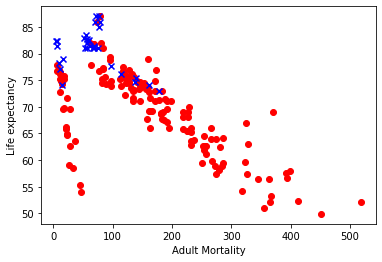

In [ ]:
df_developing = df_2013[df_2013['Status'] == "Developing"]
df_developed = df_2013[df_2013['Status'] == "Developed"]
plt.scatter('Adult Mortality', 'Life expectancy ', data = df_developing, marker = 'o', color = "red")
plt.scatter('Adult Mortality', 'Life expectancy ', data = df_developed, marker = 'x', color = "blue")
plt.ylabel("Life expectancy")
plt.xlabel("Adult Mortality")
plt.show()



---


**Visualizing relation between ICOR and Life Expectancy**


---



In [ ]:
df_ICOR = df_2013.sort_values(by = "Income composition of resources", ascending = False)
df_ICOR.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1912,Norway,2013,Developed,81.5,62.0,0,6.21,234.782883,92.0,8,6.3,0,94.0,9.39,94.0,0.1,1291.43500,579623.0,0.8,0.7,0.942,17.5
2523,Switzerland,2013,Developed,83.0,52.0,0,9.73,19099.045060,92.0,175,56.6,0,96.0,11.71,96.0,0.1,84658.88768,889346.0,0.4,0.3,0.934,15.8
114,Australia,2013,Developed,82.5,61.0,1,9.87,11734.853810,91.0,158,65.5,1,91.0,9.36,91.0,0.1,67792.33860,23117353.0,0.6,0.6,0.933,20.3
739,Denmark,2013,Developed,81.0,75.0,0,9.50,10261.763000,92.0,17,58.1,0,94.0,11.25,94.0,0.1,61191.19263,5614932.0,1.1,0.9,0.924,18.7
1831,Netherlands,2013,Developed,81.4,6.0,1,8.68,1475.030397,51.0,2632,61.0,1,97.0,11.40,97.0,0.1,51574.48942,1684432.0,1.0,0.9,0.922,18.1


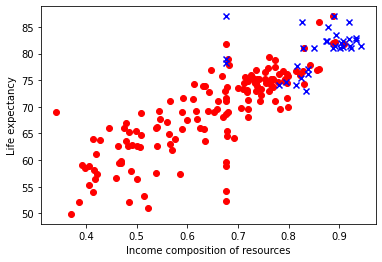

In [ ]:
plt.scatter('Income composition of resources', 'Life expectancy ', data = df_developing, marker = 'o', color = "red")
plt.scatter('Income composition of resources', 'Life expectancy ', data = df_developed, marker = 'x', color = "blue")
plt.ylabel("Life expectancy")
plt.xlabel("Income composition of resources")
plt.show()



---


**Visualizing relation between Schooling and Life Expectancy**


---



In [ ]:
df_Schooling = df_2013.sort_values(by = "Schooling", ascending = False)
df_Schooling.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
114,Australia,2013,Developed,82.5,61.0,1,9.87,11734.853810,91.0,158,65.5,1,91.0,9.36,91.0,0.1,67792.33860,23117353.0,0.6,0.6,0.933,20.3
1847,New Zealand,2013,Developed,81.3,69.0,0,9.18,10019.076300,93.0,8,66.4,0,92.0,11.17,92.0,0.1,42889.88141,1391756.5,0.3,0.3,0.908,19.3
1172,Iceland,2013,Developed,82.4,5.0,0,7.31,764.544069,92.0,0,6.2,0,91.0,8.75,91.0,0.1,4781.38880,323764.0,1.0,0.9,0.907,19.0
739,Denmark,2013,Developed,81.0,75.0,0,9.50,10261.763000,92.0,17,58.1,0,94.0,11.25,94.0,0.1,61191.19263,5614932.0,1.1,0.9,0.924,18.7
1252,Ireland,2013,Developed,81.0,67.0,0,10.49,703.552733,95.0,51,61.3,0,96.0,8.10,96.0,0.1,5234.76736,4598294.0,0.3,0.2,0.902,18.6


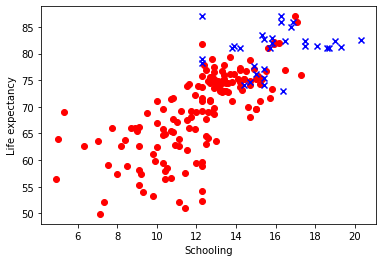

In [ ]:
plt.scatter('Schooling', 'Life expectancy ', data = df_developing, marker = 'o', color = "red")
plt.scatter('Schooling', 'Life expectancy ', data = df_developed, marker = 'x', color = "blue")
plt.ylabel("Life expectancy")
plt.xlabel("Schooling")
plt.show()



---
**Visualizing relation between HIV/AIDS deaths per 1000 live births and life expectancy**


---



In [ ]:
df_HIV = df_2013.sort_values(by = " HIV/AIDS", ascending = False)
df_HIV.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2491,Swaziland,2013,Developing,57.6,393.0,2,0.01,708.955665,98.0,0,31.2,3,98.0,9.66,98.0,9.8,3598.759720,1271456.0,4.5,4.6,0.539,11.4
1476,Lesotho,2013,Developing,52.1,518.0,4,0.01,153.344315,93.0,516,31.4,6,9.0,11.70,93.0,9.6,1196.133500,2117361.0,6.1,5.9,0.484,11.1
2924,Zimbabwe,2013,Developing,58.0,399.0,25,6.39,10.666707,95.0,0,3.8,36,95.0,6.88,95.0,6.8,111.227396,155456.0,6.2,6.0,0.488,10.4
1572,Malawi,2013,Developing,56.7,394.0,29,0.01,55.831076,89.0,1,18.8,42,89.0,1.96,89.0,6.3,332.922339,16577147.0,6.5,6.4,0.459,10.7
836,Equatorial Guinea,2013,Developing,57.4,327.0,3,10.72,156.390769,92.0,321,23.5,4,3.0,3.73,3.0,5.7,2246.993800,183746.0,8.6,8.6,0.586,9.2


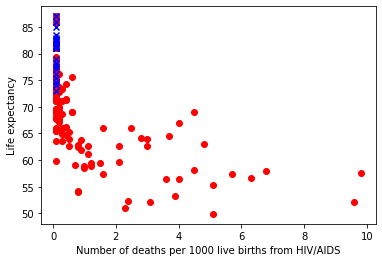

In [ ]:
plt.scatter(' HIV/AIDS', 'Life expectancy ', data = df_developing, marker = 'o', color = "red")
plt.scatter(' HIV/AIDS', 'Life expectancy ', data = df_developed, marker = 'x', color = "blue")
plt.ylabel("Life expectancy")
plt.xlabel("Number of deaths per 1000 live births from HIV/AIDS")
plt.show()

### Correlation
To describe our data, it is integral to observe the correlation between different fields. The heatmap below plots the matrix of correlation coefficients of the fields in our dataframe

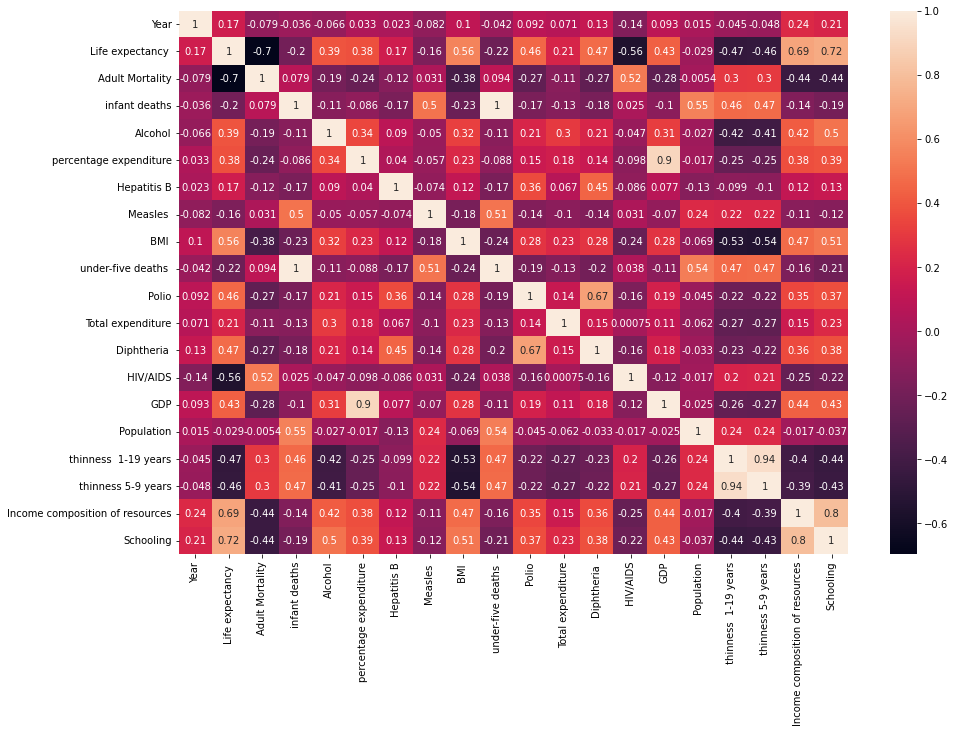

In [ ]:
# plot showing the hetmap for the correlation matrix using seaborn heatmap
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

### Correlation analysis
Since the predicitng feature for our project is the `Life expectancy`, the correlation of each feature with it is essential. The output below demonstrates how the variance in each feature correlates with the variation in the `Life expectancy` field.

We can note that the features `Schooling`, `Adult Mortality`, and `Income composition of resources` are the most highly correlated with `Life Expectancy`

In [ ]:
print(df.corr()['Life expectancy '])

Year                               0.170033
Life expectancy                    1.000000
Adult Mortality                   -0.696359
infant deaths                     -0.196557
Alcohol                            0.390674
percentage expenditure             0.381864
Hepatitis B                        0.171255
Measles                           -0.157586
 BMI                               0.558888
under-five deaths                 -0.222529
Polio                              0.459458
Total expenditure                  0.209588
Diphtheria                         0.473268
 HIV/AIDS                         -0.556556
GDP                                0.430991
Population                        -0.028842
 thinness  1-19 years             -0.467859
 thinness 5-9 years               -0.462645
Income composition of resources    0.688591
Schooling                          0.717314
Name: Life expectancy , dtype: float64




---


# **Multiple Linear Regression - 2013 Year only**


---



In order to understand how accurately a multilinear regression model can predict the life expectancy in any country in the year 2013, we use only the samples which correspond to the year 2013.

We picked 2013 because that is the latest year where data from 183 countries is available


---



In [ ]:
# Load data into dataframe
df_2013 = df[df['Year'] == 2013]
print(df_2013.shape)

(183, 22)


In [ ]:
df_2013.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
18,Albania,2013,Developing,77.2,84.0,0,4.76,430.876979,99.0,0,56.5,1,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2
34,Algeria,2013,Developing,75.3,112.0,21,0.53,544.450743,95.0,25,57.2,24,95.0,7.12,95.0,0.1,5471.866766,38338562.0,5.9,5.8,0.737,14.4
50,Angola,2013,Developing,51.1,355.0,69,8.10,35.958573,77.0,8523,22.1,105,67.0,4.26,77.0,2.3,484.616884,2599834.0,8.6,8.5,0.523,11.4
66,Antigua and Barbuda,2013,Developing,76.1,133.0,0,8.58,1991.430372,99.0,0,46.4,0,98.0,5.33,99.0,0.2,12224.864160,1391756.5,3.3,3.3,0.781,13.9




---
**Load life expectancies into target variable `givenLifeExpectancy`**


---


In [ ]:
df_lifeExpectancy_2013 = df_2013.iloc[:, 3]
givenLifeExpectancy = df_lifeExpectancy_2013.values



---


**Load features values into `features` variable**


---




In [ ]:
# Inlude 18 features that will predict the life expectancy
x = df_2013.iloc[:,4:]
features = x.values
features.shape

(183, 18)



---


**Split data into training and test**


---



In [ ]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(features, givenLifeExpectancy, test_size = 0.33)



---

**Train the model**


---



In [ ]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train, y_train)

LinearRegression()



---
**`LR.score(x, y)` performs the following under the hood**:
1. **Predicts y with input as x**
2. **Outputs an R2 value**


---



In [ ]:
# While the training score is high,
r2 = LR.score(x_train, y_train)
print("R2 value on training data is: ", round(r2,2))

R2 value on training data is:  0.86


In [ ]:
# the test score is 
# Low score value probably because the data used consisted of only
# 193 rows/countries whose feature values were vastly different
# from one another
r2 = LR.score(x_test, y_test)
print("R2 value on testing data is: ", round(r2,2))

R2 value on testing data is:  0.72




---


#**Multiple Linear Regression - All Years**


---



The following model will use data from all years
and the data will also be scaled before training
the model
A more robust model is deployed where:
1. The feature data will be scaled before training the model
2. The model will be trained on data from all years and not just 2013


---



In [ ]:
# Features and life expectancy are loaded into variables
features = df.iloc[:,4:]
givenLifeExpectancy = df['Life expectancy ']
features.shape

(2928, 18)



---

**Split into training and test**


---



In [ ]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(features, givenLifeExpectancy, test_size = 0.5, random_state = 42)

# Scale the feature data
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
x_train=scaling.fit_transform(x_train)
x_test=scaling.transform(x_test)



---
**Train the model**


---




In [ ]:
# Train the model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
yhat = model.predict(x_train)



---
**`model.score(x, y)` performs the following under the hood**:
1. **Predicts y based with input as x**
2. **Outputs an R2 value**


---



In [ ]:
# Score on the training data is low
r2 = model.score(x_train,y_train)
print("R2 value on training data is: ", round(r2,2))

R2 value on training data is:  0.82


In [ ]:
# Score on the test data is low
r2 = model.score(x_test, y_test)
print("R2 value on testing data is: ", round(r2,2))

R2 value on testing data is:  0.82




---

#**Moving beyond Multilinear Regression**



---





In this section, we implement the following models to check which most accurately predicts life expectancy:
1. Multilinear Regression
2. SVR
3. K Neighbors Regressor
4. Decision Tree Regressor
5. Random Forest Regressor

---



**Split into training and test**


---



In [ ]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(features, givenLifeExpectancy, test_size = 0.25, random_state = 42)



---

**Scale the data**


---



In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)



---
**Import necessary libraries**


---



In [ ]:
# Faster implementation but considers only a linear kernel
from sklearn.linear_model import LinearRegression

# SVR finds best fit line also known as hyperplane
# which tries to fit most datapoints within the threshold value
# which is the region between the boundary line and the hyperplane
# Models using SVR depend on subset of training dataset
# Whichever cost function it uses, it ignores samples
# whose prediction is close to the target
# Every point within the threshold is a 'vector' in 2D space
# Points outside the boundary line are 'support vectors'
# SVR is more robust to outliers than Linear Regression
from sklearn.svm import SVR

# Value is predicted based on K nearest training datapoints
# KNN is non-parametric, it does not take a functional form
# unlike Linear Regression which assumes a linear model
# However, if K value is less, the model could be overfitted
# consequently, variance of error estimates will be very high
# Default value of number of neighbors to use is 5
from sklearn.neighbors import KNeighborsRegressor

# A decision tree is arriving at an estimate by asking a series 
# of questions to the data, each question narrowing our possible 
# values until the model get confident enough to make a single prediction
from sklearn.tree import DecisionTreeRegressor

# Often, a single tree is not sufficient for producing effective results
# Random Forest is a tree-based machine learning algorithm that leverages 
# the power of multiple decision trees for making decisions
# Each node in the decision tree works on a random subset of features to calculate the output
# The random forest then combines the output of individual decision trees to generate the final output
from sklearn.ensemble import RandomForestRegressor



---

**Function to display MSE and R2 of each model for training and test data separately**


---



In [ ]:
def predictive_models(x_train, x_test, y_train, y_test):
    algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
                  RandomForestRegressor(n_estimators = 100, random_state = 0)]
    
    algorithm_names = ["Linear Regression","SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]
    
    # MSE for training data
    Mean_Squared_Error_Training = []
    # MSE for testing data
    Mean_Squared_Error_Testing = []
    # R2 for training data
    R2_Training = []
    # R2 for testing data
    R2_Testing = []
    
    # Regression models
    for i in algorithms:
        model = i
        model.fit(x_train,y_train)
    
        y_test_predict = model.predict(x_test)
        y_train_predict = model.predict(x_train)
            
        mse_1 = round(mean_squared_error(y_train, y_train_predict), 4)
        mse_2 = round(mean_squared_error(y_test, y_test_predict), 4)  
        r2_train = round(model.score(x_train, y_train), 4)
        r2_test = round(model.score(x_test, y_test), 4)
        
        # Appending the Errors into the list for training data
        Mean_Squared_Error_Training.append(mse_1)
        R2_Training.append(r2_train)
        # Appending the Errors into the list for training data
        Mean_Squared_Error_Testing.append(mse_2)
        R2_Testing.append(r2_test)
        
    # Creating DataFrame for Logs of Models and their errors    
    results = pd.DataFrame({"Models":algorithm_names,"Mean Squared Error Training":Mean_Squared_Error_Training,      
                            "Mean Squared Error Testing":Mean_Squared_Error_Testing, "R2 score Training": R2_Training, "R2 score Testing": R2_Testing})

    return results



---

**Display results**


---



In [ ]:
results = predictive_models(x_train, x_test, y_train, y_test)
results

,Models,Mean Squared Error Training,Mean Squared Error Testing,R2 score Training,R2 score Testing
0,Linear Regression,16.5321,16.5437,0.8192,0.8129
1,SVR,12.3379,12.4565,0.8650,0.8591
2,KNeighbors Regressor,4.9424,8.8202,0.9459,0.9003
3,Decision-Tree Regressor,0.0000,7.0276,1.0000,0.9205
4,Random-Forest Regressor,0.5146,3.0672,0.9944,0.9653




---


Results show that Random-Forest Regressor would be the most accurate model to use with this dataset. 

Although Decision-Tree Regressor has a 0 MSE, the MSE for testing data is consistently lower for Random-forest Regressor every time it is run


---



**Plot feature importance using RandomForestRegressor model**


---



The results show that following is the order of feature importance:
1. HIV/AIDS
2. Income composition of resources
3. Adult Mortality

Text(0, 0.5, 'Feature names')

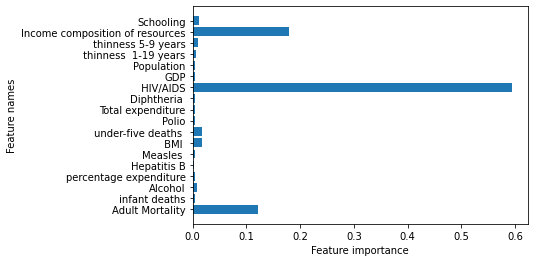

In [ ]:
RandomForestRegressor(n_estimators = 100, random_state = 0)
model = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(x_train, y_train)
featureNames = ['Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']
plt.barh(featureNames, model.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature names")



---


Deaths per 1000 life births from HIV/AIDS most heavily affects life expectancy


---



## Individual Feature Simple Linear Regressions

The code below iterates for each of our predicting features individually. For each feature, we perform a simple linear regression of the respective feature against `Life Expectancy`.

We then record the **coefficient of determination (R square)** for each of these linear regressions in an array.

The results show that following is the order of feature importance:
1. Schooling
2. Income composition of resources
3. Adult Mortality
4. BMI
5. HIV/AIDS

The code below outputs the R-square scores from Linear Regression of each features individually.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: Legend does not support 'u' instances.
A proxy artist may be used instead.
See: http://matp

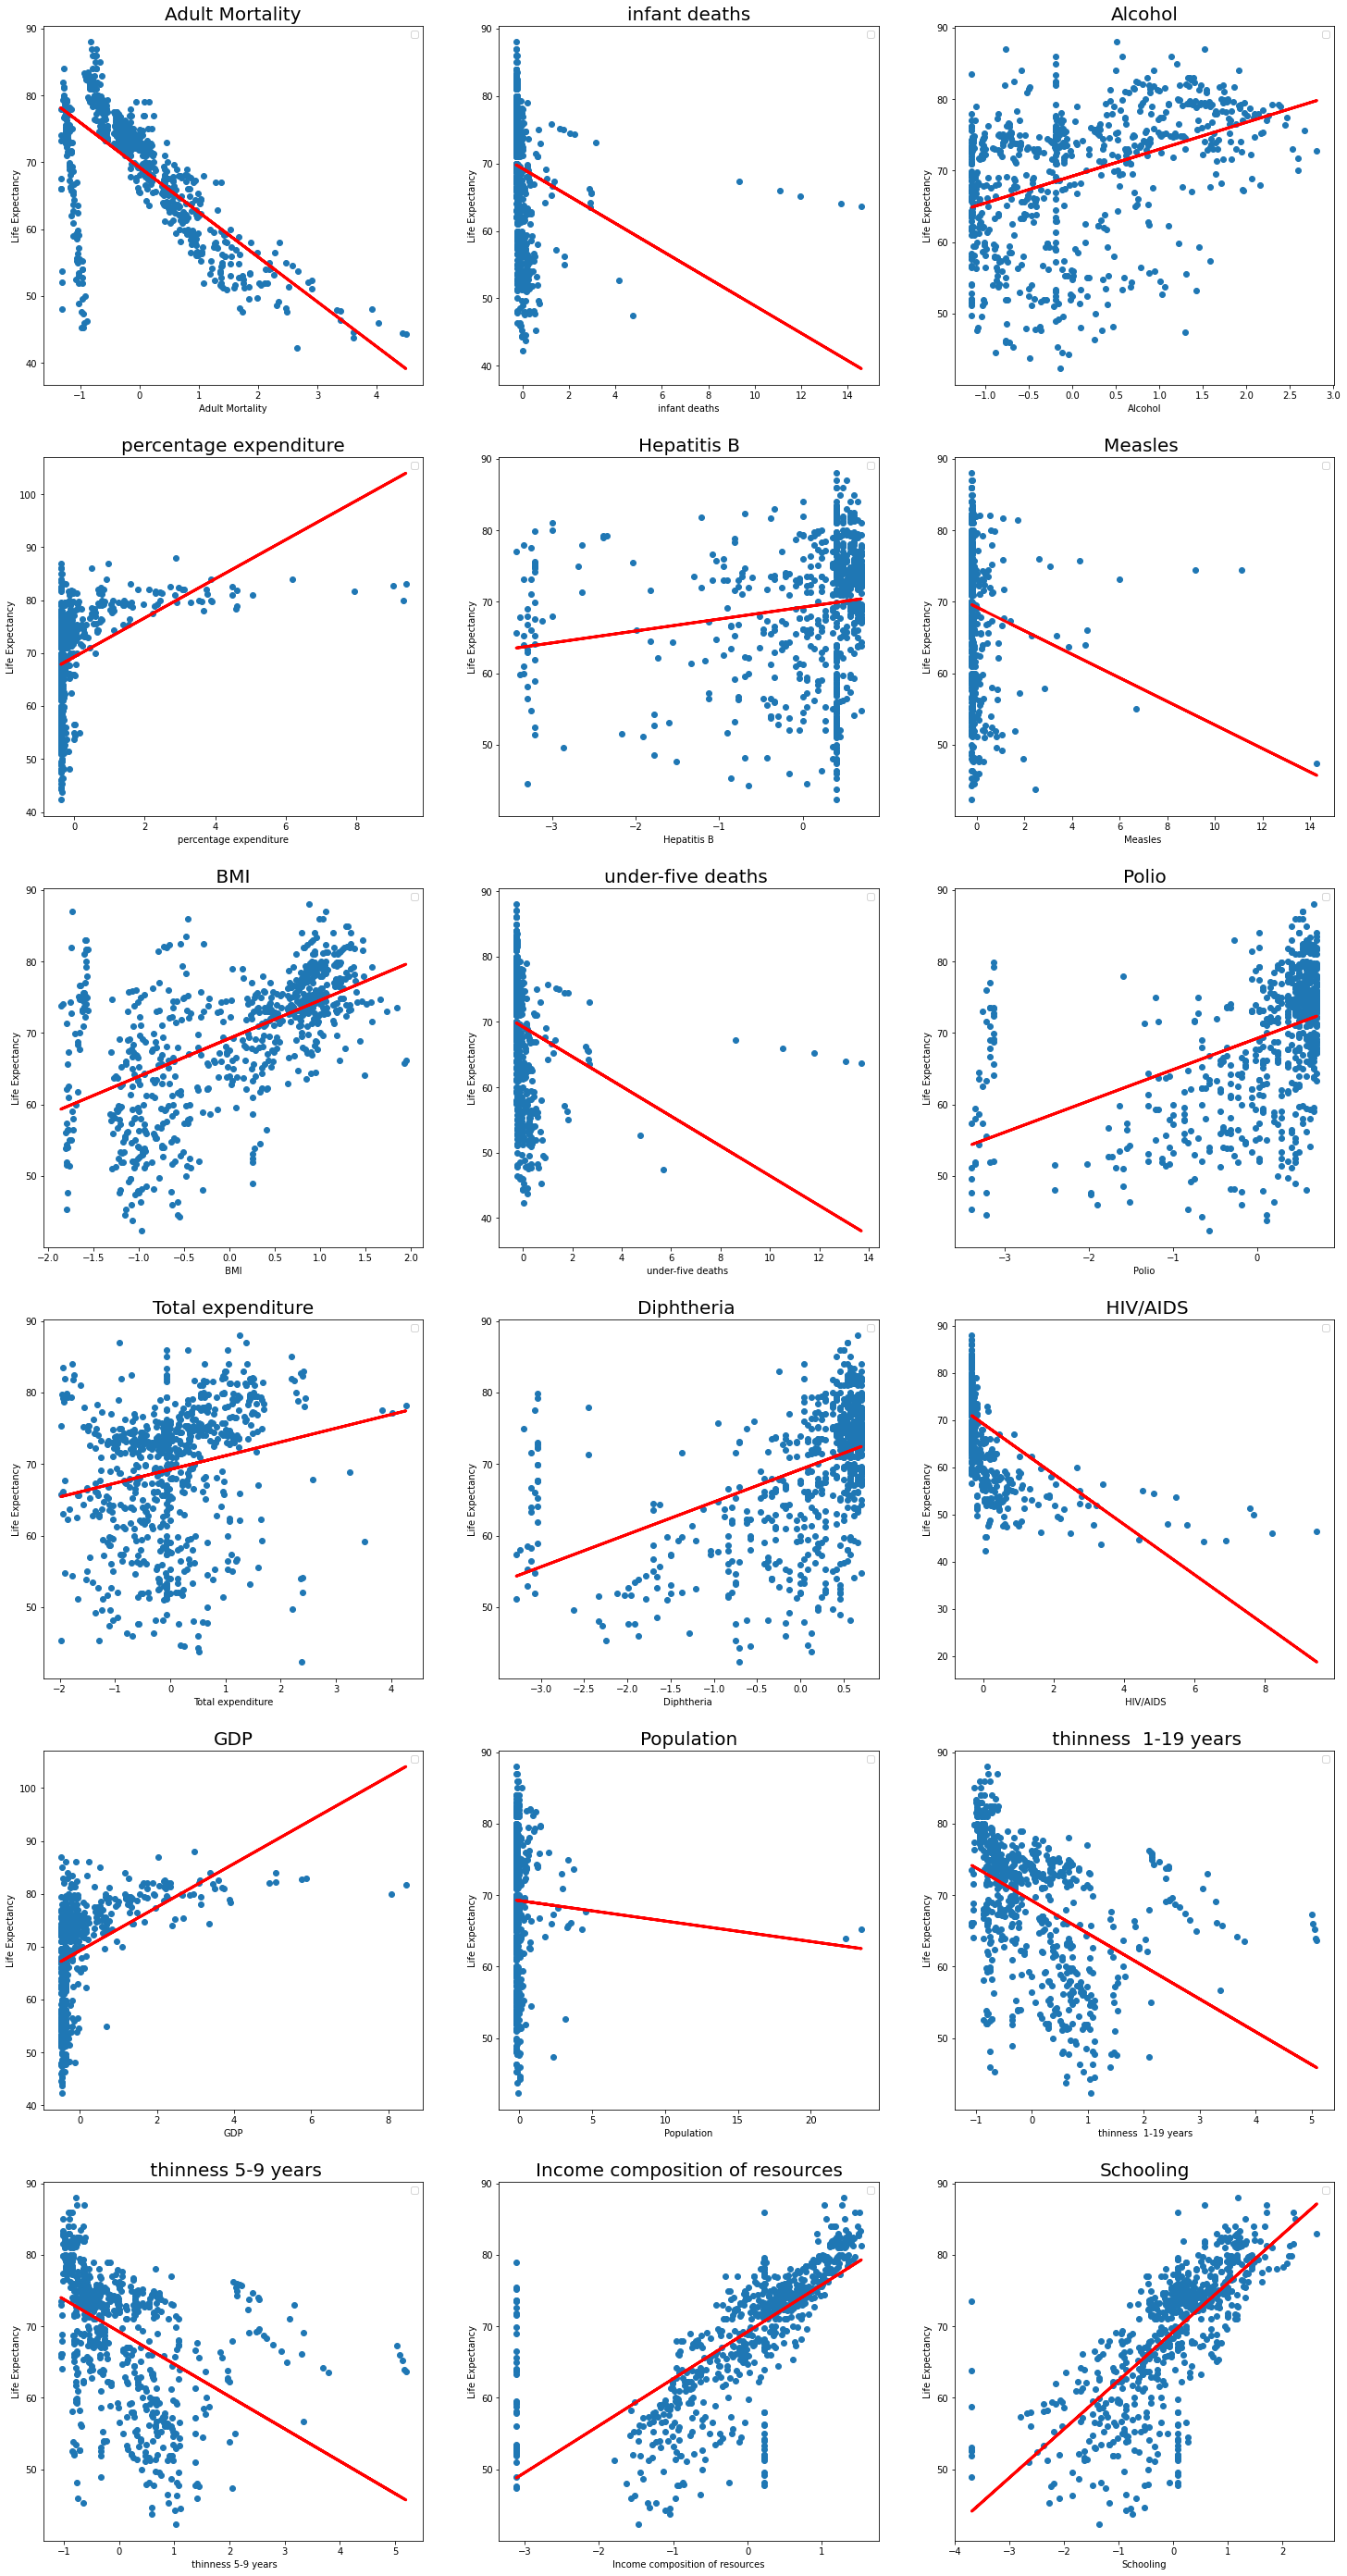

In [ ]:
# array to store simple linear regression scores
LR_R2 = []

model = LinearRegression()
n = x_train.shape[1] # number of features

plt.figure(figsize=(25,50))

# loop over the features
for i in range(n):
  # extract the individual feature from the training and test X values.
  # since the model requires 2D arrays, reshape them respectively
  x1_train = x_train[:,i].reshape(-1, 1)
  x1_test = x_test[:,i].reshape(-1, 1)
  # train the model
  model.fit(x1_train,y_train)
  yhat = model.predict(x1_test)
  # calculate the R square scores and append them to array
  r2_test = round(model.score(x1_test, y_test), 4)
  LR_R2.append(r2_test)

  # plot the scatterplot of actual values and the regression line for each feature
  plt.subplot(6,3,i+1)
  plt.plot(x1_test, y_test, 'o')
  plt.plot(x1_test, yhat, 'r-', linewidth=3)
  plt.xlabel(featureNames[i])
  plt.ylabel("Life Expectancy")
  plt.legend("actual " +featureNames[i], "predicted " +featureNames[i])
  plt.title(featureNames[i], fontsize = 20 )


In [ ]:
feature_correlation = pd.DataFrame({"Feature":featureNames,"LR_R2 score": LR_R2})
feature_correlation

,Feature,LR_R2 score
0,Adult Mortality,0.4663
1,infant deaths,0.0157
2,Alcohol,0.1457
3,percentage expenditure,0.1347
4,Hepatitis B,0.0260
5,Measles,0.0089
6,BMI,0.3205
7,under-five deaths,0.0249
8,Polio,0.2144
9,Total expenditure,0.0543


We loop over and drop each prediciting factors individually and against predict using the machine learning models for all the other features. The output below shows the R-square score Testing values for the Random-Forest Regressor, since it has proved to be the most accurate.

The results below show that model is least accurate without:
1. HIV/AIDS 
2. Adult Mortality
3. Income Composition of resources
4. Schooling

In [ ]:
R2_values = []
# loop over and individually drop the features
for i in range(n):
  dropped_income_train = np.delete(x_train, i, axis=1)
  dropped_income_test = np.delete(x_test, i, axis=1)
  # calculate the results from the dropped feature values
  results_dropped_income = predictive_models(dropped_income_train, dropped_income_test, y_train, y_test)
  R2_values.append(results_dropped_income.iloc[-1,-1])

dropped_features = pd.DataFrame({"Missing Feature":featureNames,"R2 score Testing": R2_values})
dropped_features

,Missing Feature,R2 score Testing
0,Adult Mortality,0.9575
1,infant deaths,0.9654
2,Alcohol,0.9650
3,percentage expenditure,0.9663
4,Hepatitis B,0.9659
5,Measles,0.9679
6,BMI,0.9642
7,under-five deaths,0.9643
8,Polio,0.9651
9,Total expenditure,0.9650


# Principal Component Analysis

Below, we perform Principal Component Analysis on our data.

This allows us to understand the percentage of total variance in the dataset that is explained by each of the features individually.

This analysis would help us understand how many components would be sufficient to provide a signifantly accurate model for our data. Thus, the outcome would be helpful for dimensionality reduction in our model.

In [ ]:
from sklearn.decomposition import PCA

# create new dataset using all required colomns for our pca and scale the values
df=df.dropna(axis=0)
pca_X = df
pca_X = pca_X.drop("Year",axis=1)
pca_X = pca_X.drop("Country",axis=1)
pca_X = pca_X.drop("Status",axis=1)
pca_X.shape
pca_x = sc.fit_transform(pca_X)

# Construct the PCA object
pca = PCA(n_components=n)

# Fit the PCA components on the entire dataset
pca.fit(pca_x)

PCs = pca.transform(pca_x)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from PCA: \n',
    pca.explained_variance_ratio_   
)

The percentage of total variance in the dataset explained by each component from PCA: 
 [0.32288376 0.14092432 0.08974509 0.07428936 0.06554506 0.04616412
 0.0440204  0.03949203 0.03224269 0.03081409 0.02627708 0.02317488
 0.02173589 0.01669851 0.01021868 0.00771372 0.00473918 0.00317872]


The plots below display how the cumulate percentage of change in variance occurs in the overall dataset for each additional component in the model

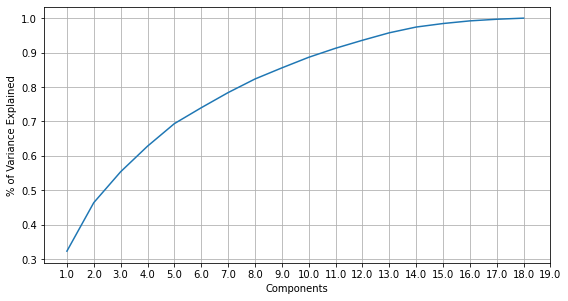

In [ ]:
# Let's visualize the above values
nfeatures = pca_x.shape[1]
xlin = np.linspace(0,nfeatures-1,nfeatures)
xlin2 = np.linspace(1,nfeatures,nfeatures)
fig, ax = plt.subplots(figsize=(8,8))

ax1 = plt.subplot(2,1,1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
ax1.set_xticks(xlin)
ax1.set_xticklabels(xlin2)
ax1.set_xlabel('Components')
ax1.set_ylabel('% of Variance Explained')
ax1.grid()


# ax2 = fig.add_subplot(2,1,2)
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# ax2.set_ylabel('% of Variance Explained')
# ax2.set_xlabel('Components')
# ax2.set_xticks(xlin)
# ax2.set_xticklabels(xlin2)
# ax2.set_ylim(.6,1);

plt.tight_layout()

# Conclusion

1. Random Forest Regressor is the most accurate model to predict life expectancy
2. HIV/AIDS, Income composition of resources, Schooling are the three consistently important features in predicting life expectancy
3. Our Principal Component Analysis shows that 2 of our components explain about 50% of our variance in the overall data set, whereas 7 components can exlain about 80% of the variance.

Governments, Public Health groups, NGOs, etc can greatly benefit from these insights in their work and contributions to public health around the world.